##Importy

In [ ]:
#importy modułów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.metrics import confusion_matrix

!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Opis zbiorów danych

*   Chess (King rook vs king) - [link](https://archive-beta.ics.uci.edu/dataset/23/chess+king+rook+vs+king)
*   Internet advertisements - [link](https://archive-beta.ics.uci.edu/dataset/51/internet+advertisements)


####**Należy się upewnić, że do notebooka są dodane pliki 'krkopt.data' oraz 'ad.data'!**





##Chess

Zestaw danych został dodany w 1994 roku, który rozważa sytuację w szachach, kiedy biały gracz posiada króla oraz wieże, a czarny tylko króla.

Rekord w danych przedstawia się w taki sposób:

*   Kolumna Białego króla
*   Wiersz Białego króla
*   Kolumna Białej wieży
*   Wiersz Białej wieży
*   Kolumna Czarnego króla
*   Wiersz Czarnego króla
*   **[Klasa]** Zwycięstwo białego gracza w N ruchach lub remis 

Wszystkie wartości są dyskretne, przyjmują wartości:
* **kolumna pionka** - {a, b, c, ... h}
* **wiersz pionka** - {1, 2, 3, ... 8}
* **zwycięstwo białego gracza** - {draw, zero, one, two, ..., sixteen}

Na przykład:

```
a, 1, b, 3, c, 2, draw
```

Zestaw zawiera 28056 rekordów i nie zawiera żadnych brakujących wartości.


In [ ]:
chess_ds=pd.read_csv("krkopt.data", header=None)

##Reklamy

Zestaw danych dodano w 1998 roku i dotyczy rozpoznawania reklam na stronach HTML.
Zestaw zawiera 3279 rekordów z czego 2821 nie są reklamami, a 458 to reklamy.

Celem zestawu jest przewidzenie czy obrazek wyświetlony na stronie HTML to reklama czy nie na podstawie słów zawartych w kodzie HTML.

Zestaw zawiera 1558 atrybutów o reklamie.
Pierwsze 3 atrybuty to wysokość, szerokość i proporcje reklamy. Dane te są ciągłe i możliwy jest ich brak. Dla naszego modelu założyłem, że reklama której rozmiaru nie znamy ma wymiary 0.

Reszta atrybutów to dane binarne informujące o występowaniu pewnych słów i fraz w kodzie HTML obrazka. Te dane są kompletne.

W ostatnim atrybucie znajduje się informacja czy dany obrazek to reklama. Dla naszego modelu zmieniłem stringi 'ad.' i 'nonad.' na 1 i 0 respektywnie.

In [ ]:
ads_dataset = pd.read_csv("ad.data", header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Przygotowanie danych

##Chess

Zestaw danych zawiera wiele wartości, które nie są liczbami, więc wszystkie oznaczenia kolumn są mapowane na wartości licbzowe, tak samo jak z klasami.

Z racji tego, że wszystkie dane przyjmują wartości z góry ustalonych zakresów (przedział [0,7]), to zamieniam je na wartości kategoryczne i łączę.


In [ ]:
#słowniki dla pozycji X oraz klas
letterMap = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'e': 4,
    'f': 5,
    'g': 6,
    'h': 7,
}

classMap = {
    'draw'    : 0,
    'zero'    : 1,
    'one'     : 2,
    'two'     : 3,
    'three'   : 4,
    'four'    : 5,
    'five'    : 6,
    'six'     : 7,
    'seven'   : 8,
    'eight'   : 9,
    'nine'    : 10,
    'ten'     : 11,
    'eleven'  : 12,
    'twelve'  : 13,
    'thirteen': 14,
    'fourteen': 15,
    'fifteen': 16,
    'sixteen' : 17,
}

mapToNumericalClass = lambda x: classMap[x]
toNumber = lambda x: letterMap[x]

for i in range(0,5,2):
  chess_ds[i] = chess_ds[i].apply(toNumber) #zamień literki na indeksy

for i in range(1, 6, 2):
  chess_ds[i] -= 1

chess_ds[6] = chess_ds[6].apply(mapToNumericalClass) #zamień klasy na indeksy

#wyciągnij wartości na wejście i wyjście
X_chess = chess_ds.iloc[:, :-1].values
Y_chess = chess_ds.iloc[:, -1].values

def to_categorical(x):
  x = [np_utils.to_categorical(elem, num_classes=8) for elem in x]
  x = [ y for elem in x for y in elem]
  return x

X_chess = np.array(list(map(to_categorical, X_chess)))

#### Wizualizacja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


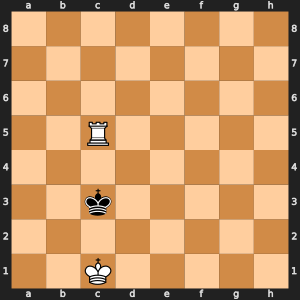

Class: fourteen


In [ ]:
!pip install chess #polecenie colaba do pobrania modułu do wizualizacji
import chess
import chess.svg
import random
from IPython.core.display import display_svg

#wybierz losowy rekord
pos = chess_ds.iloc[[random.randint(0, chess_ds.shape[0])]].values[0]

board = chess.Board('8/8/8/8/8/8/8/8') #inicjalizuj pustą szachownicę

#zamień pozycje z bazy na obiekt
p1 = chess.parse_square(pos[0]+str(pos[1])) 
p2 = chess.parse_square(pos[2]+str(pos[3]))
p3 = chess.parse_square(pos[4]+str(pos[5]))

#ustaw pionki na pozycji
board.set_piece_at(p1, chess.Piece(chess.KING, chess.WHITE))
board.set_piece_at(p2, chess.Piece(chess.ROOK, chess.WHITE))
board.set_piece_at(p3, chess.Piece(chess.KING, chess.BLACK))

#wyświetl pozycje i klasę
display_svg(chess.svg.board(board, size=300))
print('Class:',pos[-1])


##Reklamy

Zestaw zawiera brakujące dane dotyczące rozmiarów niektórych obrazków, wypełniam nieznane wymiary jako zera.

In [ ]:
# Zamiana informacji o tym czy rekord jest reklamą na 1 i 0
ads_dataset = ads_dataset.replace(to_replace="ad.",value=1)
ads_dataset = ads_dataset.replace(to_replace="nonad.",value=0)

# Zamiana danych na typ numeryczny.
ads_dataset = ads_dataset.apply(pd.to_numeric, errors='coerce')

# Wypełnenie brakujących atrybutów rozmiaru obrazka zerami.
ads_dataset = ads_dataset.fillna(0)

#### Wizualizacja

Przykładowe 5 rekordów z datasetu.

In [ ]:
txt_file = open("names.txt", "r")
file_content = txt_file.read()
content_list = file_content.split(",")
txt_file.close()
ads_dataset.columns = content_list
ads_dataset.head()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,isad\n
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Przykład rekordu który jest reklamą. Można zauważyć znaczące słowa takie jak np. 'ads', 'adclick', 'click here'.

In [ ]:
pd.set_option('display.max_columns', None)
example1 = ads_dataset.iloc[[55]]
example1 = example1.loc[:, (example1 != 0).all()]
example1.head()

,height,width,aratio,local,url*go2net,url*images.go2net.com,url*go2net+ads,url*go2net.com,url*ads,origurl*target+ ion,origurl*0+rpp,origurl*target,origurl* ion+0,origurl*crawler,origurl*timeout+5,origurl*kushmerick,origurl*5+hpe,origurl*rpp,origurl*20+timeout,origurl*hpe,origurl*www.metacrawler.com,origurl*metacrawler.com,origurl*general+kushmerick,origurl*timeout,origurl*general,origurl*crawler+general,origurl*rpp+20,origurl*hpe+10,origurl*method,origurl*kushmerick+method,origurl*method+0,origurl* ion,ancurl*2fcrawler,ancurl*adclick,ancurl*magic+adclick,ancurl*plug.go2net.com,ancurl*gid,ancurl*qual,ancurl*delv,ancurl*qual+mc,ancurl*dir,ancurl*3a+2fcrawler,ancurl*magic,ancurl*go2net.com,ancurl*delv+dir,ancurl*dir+qual,ancurl*mc,ancurl*id,ancurl*3a,ancurl*adclick+id,ancurl*mc+3a,alt*here,alt*click+here,alt*to,alt*click,alt*here+to,isad\n
55,125.0,125.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Przykład rekordu, który nie jest reklamą.

In [ ]:
example2 = ads_dataset.iloc[[3200]]
example2 = example2.loc[:, (example2 != 0).all()].join(example2.iloc[:,[-1]])
example2.head()

,height,width,aratio,url*catring1,url*catring1+gif,origurl*www.interchg.ubc.ca,origurl*ubc.ca,origurl*djang,origurl*msheryl,origurl*msheryl+djang,origurl*djang+html,ancurl*webring.org,ancurl*next,ancurl*bin+webring,ancurl*ring,ancurl*www.webring.org,ancurl*webring+ring,ancurl*ring+midnight,ancurl*midnight+id,ancurl*bin,ancurl*id,ancurl*webring,ancurl*midnight,isad\n
3200,128.0,178.0,1.3906,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


#Chess - FFNN

##Struktura sieci

Przed skonstruowaniem sieci, normalizuję dane i rozdzielam na dane testowe i do uczenia.


In [ ]:
#podziel dane na dane testowe i treningowe
X_chess_train, X_chess_test, Y_chess_train, Y_chess_test = train_test_split(X_chess, Y_chess, test_size=0.20, random_state=31)

#zmień klasy
Y_chess_train=np_utils.to_categorical(Y_chess_train,num_classes=18)
Y_chess_test=np_utils.to_categorical(Y_chess_test,num_classes=18)

Następnie konstruuję model. Jako punkt odniesienia zastosowałem przykład zaimplementowany w pokazanym przykładzie.



In [ ]:
# Initialising the ANN
chess_model = Sequential()

# Adding the input layer and the first hidden layer
chess_model.add(Dense(1000,input_dim=48,activation='relu', kernel_initializer='ones', bias_initializer='zeros'))
chess_model.add(Dense(50,activation='relu', kernel_initializer='ones', bias_initializer='zeros'))

#Protects against overfitting
chess_model.add(Dropout(0.2))

# Adding the output layer
chess_model.add(Dense(18,activation='softmax', kernel_initializer='ones', bias_initializer='zeros'))

# Compiling the ANN
chess_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NameError: ignored

##Uczenie sie

Następnie model poddałem uczeniu sie. Na potrzeby raportu, liczba epochów została zmniejszona dla 10, lecz dalsze analizy modelów oraz dokładnie uczenie modelu zostały przeprowadzone dla 200-500 epochów.

In [ ]:
chess_model.fit(X_chess_train,Y_chess_train,validation_data=(X_chess_test,Y_chess_test),batch_size=30,epochs=10,verbose=1, use_multiprocessing=1)

Epoch 1/10
749/749 [==============================] - 5s 6ms/step - loss: 1.8027 - accuracy: 0.3517 - val_loss: 1.3582 - val_accuracy: 0.5050
Epoch 2/10
749/749 [==============================] - 3s 4ms/step - loss: 1.2198 - accuracy: 0.5396 - val_loss: 0.9693 - val_accuracy: 0.6411
Epoch 3/10
749/749 [==============================] - 3s 4ms/step - loss: 0.9352 - accuracy: 0.6369 - val_loss: 0.7863 - val_accuracy: 0.6981
Epoch 4/10
749/749 [==============================] - 3s 4ms/step - loss: 0.7945 - accuracy: 0.6903 - val_loss: 0.6900 - val_accuracy: 0.7398
Epoch 5/10
749/749 [==============================] - 3s 4ms/step - loss: 0.7035 - accuracy: 0.7280 - val_loss: 0.6572 - val_accuracy: 0.7488
Epoch 6/10
749/749 [==============================] - 3s 4ms/step - loss: 0.6323 - accuracy: 0.7560 - val_loss: 0.5983 - val_accuracy: 0.7664
Epoch 7/10
749/749 [==============================] - 3s 4ms/step - loss: 0.5807 - accuracy: 0.7727 - val_loss: 0.5730 - val_accuracy: 0.7737
Epoch 

##Wyniki

In [ ]:
# Predicting the Test set results
y_pred = chess_model.predict(X_chess_test)
y_pred = (y_pred > 0.5)

prediction=chess_model.predict(X_chess_test)
length=len(prediction)
y_label=np.argmax(Y_chess_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#how times it matched/ how many test cases
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

176/176 [==============================] - 0s 2ms/step
Accuracy of the dataset 81.46828225231646


Analizując wyniki, doszedłem do wniosku, że jest tutaj miejsce do ulepszeń, chociaż wyniki na tylko 10 epok są podejrzanie wysokie. Sam model był robiony do zupełnie innego problemu, co również może mieć wpływ na wyniki.

##Dostrajanie

Dodatkowe dostrajanie modelu opierało się na dwóch sposobach:


1.   W modelu były zmieniane pojedyńcze parametry, takie jak funckja obliczania strat
2.   Zestawiane były 2 modele z różnymi strukturami oraz funkcjami aktywacji, a następnie robiony był wykres wzrostu precyzji w zależności od liczby epochów. Model którego precyzja rosła szybciej lub miał większą precyzję dla tych samych danych był uznawany za lepszy.

W przypadku drugiego punktu warto zwrócić uwagę na to, że za każdym razem dwa modele inicjalizują swoje wagi losowo, przez co wyniki końcowe mogą się dość różnić. Zamienienie inicjalizacji wag zerami i jedynkami, co by dało nam takie same wagi sprawia, że precyzja zmniejsza się drastycznie do ~15% pod koniec 10 epoki (wersja podstawowa ma powyżej 80% w tej epoce).




In [ ]:
# Initialising the ANN
chess_model1 = Sequential()

# Adding the input layer and the first hidden layer
chess_model1.add(Dense(1000,input_dim=48,activation='relu'))
chess_model1.add(Dense(500,activation='relu'))
chess_model1.add(Dropout(0.1))
chess_model1.add(Dense(100,activation='relu'))


#Protects against overfitting
chess_model1.add(Dropout(0.2))

# Adding the output layer
chess_model1.add(Dense(18,activation='softmax'))

# Compiling the ANN
chess_model1.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])
chess_model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=30,epochs=10,verbose=1, use_multiprocessing=1)

# Predicting the Test set results
y_pred = chess_model1.predict(X_test)
y_pred = (y_pred > 0.5)

prediction=chess_model1.predict(X_test)
length=len(prediction)
y_label=np.argmax(Y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#how times it matched/ how many test cases
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Epoch 1/10
749/749 [==============================] - 15s 19ms/step - loss: 1.4159 - accuracy: 0.4709 - val_loss: 1.0624 - val_accuracy: 0.5768
Epoch 2/10
749/749 [==============================] - 14s 18ms/step - loss: 0.7762 - accuracy: 0.6978 - val_loss: 0.6915 - val_accuracy: 0.7251
Epoch 3/10
749/749 [==============================] - 10s 14ms/step - loss: 0.5966 - accuracy: 0.7691 - val_loss: 0.8429 - val_accuracy: 0.6921
Epoch 4/10
749/749 [==============================] - 10s 14ms/step - loss: 0.4772 - accuracy: 0.8200 - val_loss: 0.5616 - val_accuracy: 0.7799
Epoch 5/10
749/749 [==============================] - 10s 14ms/step - loss: 0.3966 - accuracy: 0.8482 - val_loss: 0.4853 - val_accuracy: 0.8136
Epoch 6/10
749/749 [==============================] - 10s 14ms/step - loss: 0.3238 - accuracy: 0.8769 - val_loss: 0.4157 - val_accuracy: 0.8441
Epoch 7/10
749/749 [==============================] - 10s 14ms/step - loss: 0.2720 - accuracy: 0.8999 - val_loss: 0.3805 - val_accuracy:

####Krzywa ROC

176/176 [==============================] - 1s 4ms/step


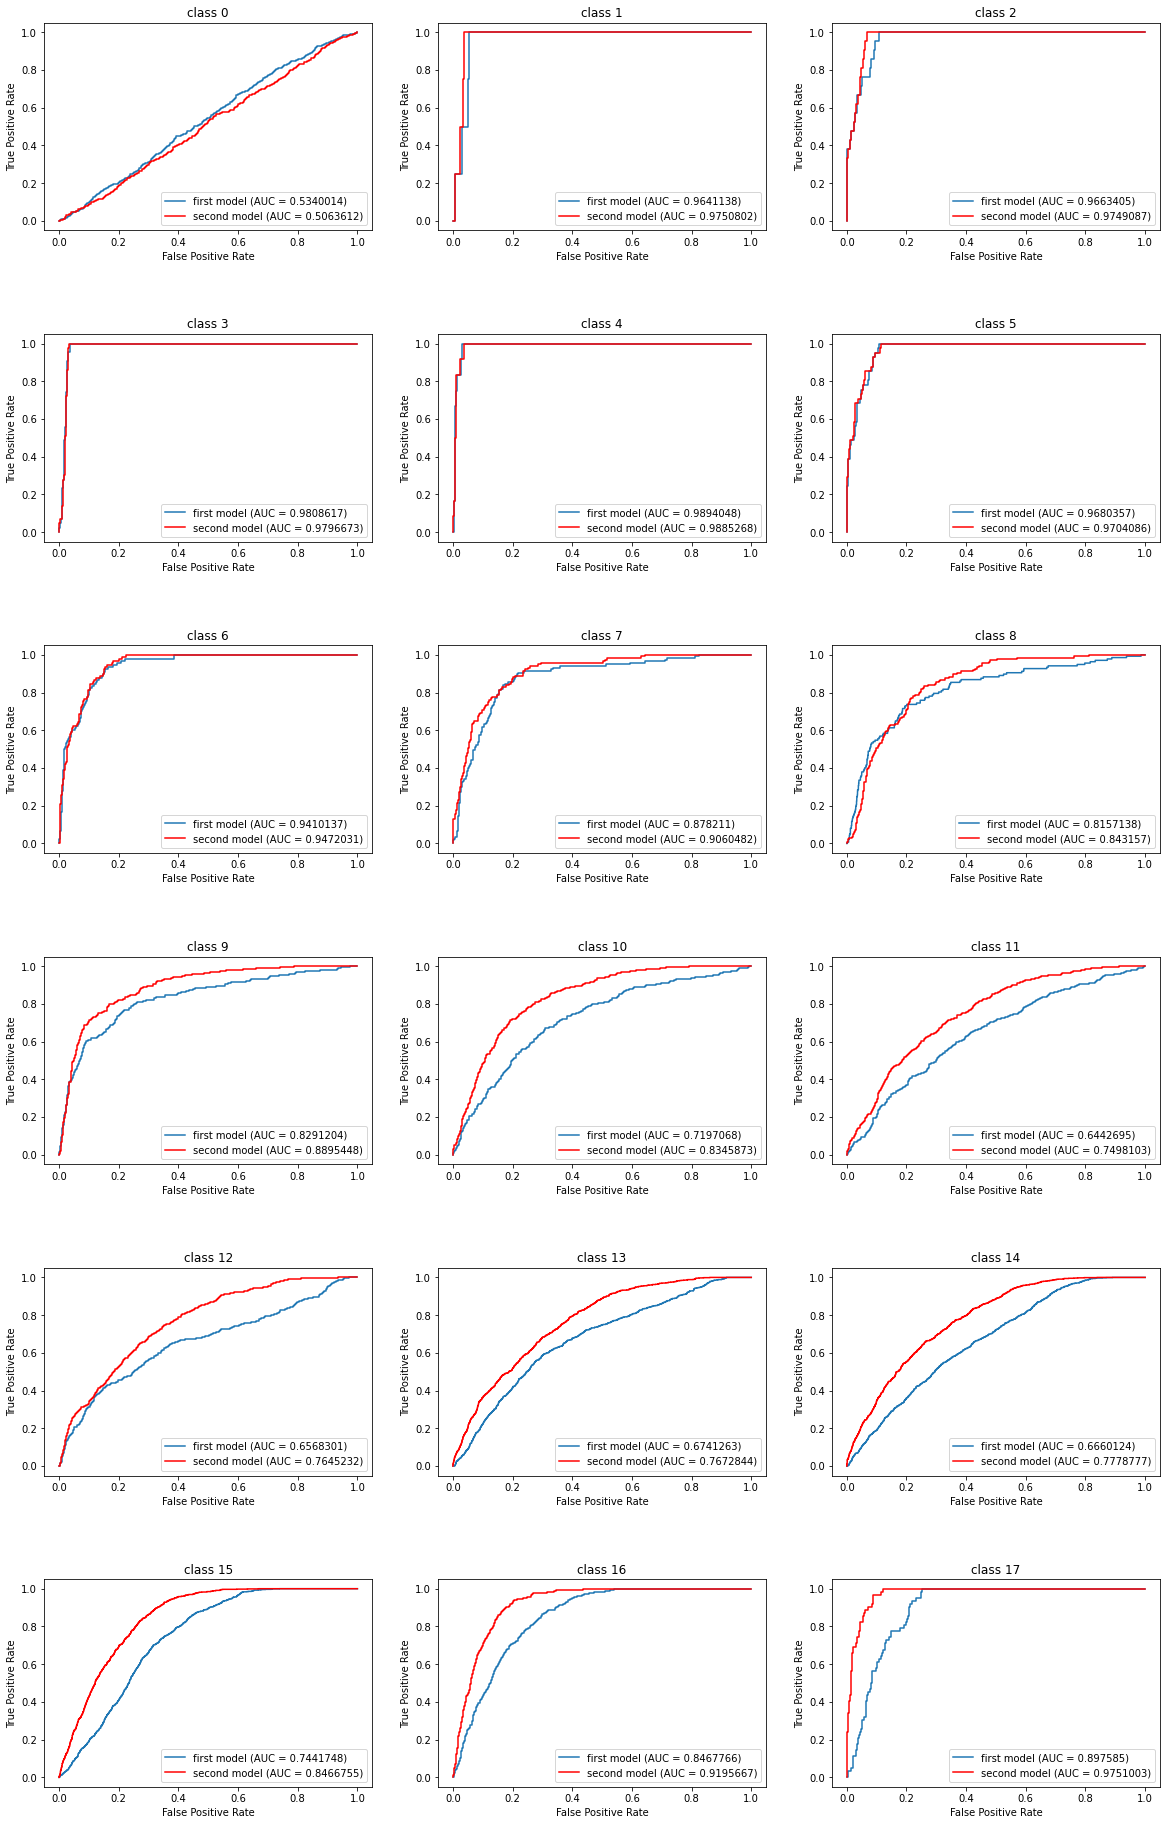

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=31)

pred = chess_model.predict(X_test)
pred1 = chess_model1.predict(X_test)
pred = np.transpose(pred)
pred1 = np.transpose(pred1)
y_test = np.transpose(Y_test)

# using the variable axs for multiple Axes
fig, axs = plt.subplots(6, 3)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.5, wspace=0.2)
fig.set_figheight(25)
fig.set_figwidth(20)

for i in range(len(pred)):
    x = i // 3
    y = i % 3
    fpr, tpr, _ = metrics.roc_curve(y_test[i],  pred[i])
    fpr1, tpr1, _ = metrics.roc_curve(y_test[i],  pred1[i])
    #create ROC curve
    axs[x, y].plot(fpr,tpr, label=f'first model (AUC = {metrics.auc(fpr, tpr):.7})')
    axs[x, y].plot(fpr1,tpr1, color='red', label=f'second model (AUC = {metrics.auc(fpr1, tpr1):.7})')
    axs[x, y].legend(loc="lower right")
    axs[x, y].set_title(f'class {i}')
    axs[x, y].set_ylabel('True Positive Rate')
    axs[x, y].set_xlabel('False Positive Rate')

plt.show()

Jak można zauważyć, dla każdej klasy krzywe są bardzo dobre, będąc blisko perfekcyjnego klasyfikatora. Dodatkowo, drugi model nie różni się za bardzo z pierwszym.

Dla klas 1-5 wartości mogą być niemiarodajne, ale z powodu małej ilości rekordów w danej klasie.

#Reklamy - FFNN

##Struktura sieci

Normalizacja danych i rozdzielenie ich na zbiory trenujące i testowe.

In [ ]:
# Zbiory atrybutów i wyników.
X_ads = ads_dataset.iloc[:, :-1].values
Y_ads = ads_dataset.iloc[:, -1].values

# Normalizacja zbioru atrybutów
X_ads = normalize(X_ads,axis=0)

# Podział zbiorów na zbiory trenujące i testowe
X_ads_train, X_ads_test, Y_ads_train, Y_ads_test = train_test_split(X_ads, Y_ads, test_size=0.30, random_state=31)

# Zamiana 1 i 0 mówiących o tym czy obrazek jest reklamą na wektory i długości
Y_ads_train=np_utils.to_categorical(Y_ads_train,num_classes=2)
Y_ads_test=np_utils.to_categorical(Y_ads_test,num_classes=2)

Konstruowanie modelu. Punktem odniesienia była kategoryzacja irysów.

In [ ]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(1000,input_dim=1558,activation='relu'))
model.add(Dense(50,activation='relu'))

#Protects against overfitting
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(2,activation='softmax'))

# Compiling the ANN
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

##Uczenie sie

Model poddaję uczeniu.

In [ ]:
model.fit(X_ads_train,Y_ads_train,validation_data=(X_ads_test,Y_ads_test),batch_size=30,epochs=10,verbose=1, use_multiprocessing=1)

Epoch 1/10
77/77 [==============================] - 4s 39ms/step - loss: 0.2812 - accuracy: 0.9007 - val_loss: 0.1268 - val_accuracy: 0.9644
Epoch 2/10
77/77 [==============================] - 2s 27ms/step - loss: 0.0877 - accuracy: 0.9717 - val_loss: 0.0936 - val_accuracy: 0.9685
Epoch 3/10
77/77 [==============================] - 2s 27ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0920 - val_accuracy: 0.9746
Epoch 4/10
77/77 [==============================] - 2s 28ms/step - loss: 0.0515 - accuracy: 0.9830 - val_loss: 0.0951 - val_accuracy: 0.9726
Epoch 5/10
77/77 [==============================] - 2s 27ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.1099 - val_accuracy: 0.9766
Epoch 6/10
77/77 [==============================] - 2s 29ms/step - loss: 0.0353 - accuracy: 0.9895 - val_loss: 0.1081 - val_accuracy: 0.9726
Epoch 7/10
77/77 [==============================] - 3s 35ms/step - loss: 0.0366 - accuracy: 0.9891 - val_loss: 0.1113 - val_accuracy: 0.9736
Epoch 8/10
77

##Wyniki

In [ ]:
# Predicting the Test set results
y_ads_pred = model.predict(X_ads_test)
y_ads_pred = (y_ads_pred > 0.5)

prediction=model.predict(X_ads_test)
length=len(prediction)
y_label=np.argmax(Y_ads_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#how times it matched/ how many test cases
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

31/31 [==============================] - 0s 13ms/step
Accuracy of the dataset 97.35772357723577


Przy zastosowaniu modelu identycznego jak dla kategoryzacji irysów otrzymałem dokładność 97.4% co jest bardzo dobrym wynikiem. Może to wynikać z łatwości problemu ponieważ w reklamach najczęścej używane są podobne słowa takie jak "click here", albo "buy now".

##Dostrajanie

In [ ]:
# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(1000,input_dim=1558,activation='relu'))
model2.add(Dense(500,activation='relu'))
model2.add(Dense(50,activation='relu'))

#Protects against overfitting
model2.add(Dropout(0.2))

# Adding the output layer
model2.add(Dense(2,activation='sigmoid'))

# Compiling the ANN
model2.compile(loss='binary_crossentropy',optimizer='nadam',metrics=['accuracy'])

model2.fit(X_ads_train,Y_ads_train,validation_data=(X_ads_test,Y_ads_test),batch_size=50,epochs=20,verbose=1, use_multiprocessing=1)


Epoch 1/20
46/46 [==============================] - 8s 95ms/step - loss: 0.2862 - accuracy: 0.8989 - val_loss: 0.1236 - val_accuracy: 0.9685
Epoch 2/20
46/46 [==============================] - 4s 77ms/step - loss: 0.0807 - accuracy: 0.9765 - val_loss: 0.0902 - val_accuracy: 0.9766
Epoch 3/20
46/46 [==============================] - 4s 87ms/step - loss: 0.0557 - accuracy: 0.9834 - val_loss: 0.0971 - val_accuracy: 0.9776
Epoch 4/20
46/46 [==============================] - 2s 51ms/step - loss: 0.0471 - accuracy: 0.9839 - val_loss: 0.0951 - val_accuracy: 0.9766
Epoch 5/20
46/46 [==============================] - 2s 44ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.1106 - val_accuracy: 0.9726
Epoch 6/20
46/46 [==============================] - 2s 45ms/step - loss: 0.0358 - accuracy: 0.9882 - val_loss: 0.1155 - val_accuracy: 0.9776
Epoch 7/20
46/46 [==============================] - 2s 46ms/step - loss: 0.0298 - accuracy: 0.9891 - val_loss: 0.1330 - val_accuracy: 0.9705
Epoch 8/20
46

In [ ]:
# Predicting the Test set results
y_ads_pred = model2.predict(X_ads_test)
y_ads_pred_confusion = y_ads_pred.copy()
y_ads_pred = (y_ads_pred > 0.5)

prediction=model2.predict(X_ads_test)
length=len(prediction)
y_label=np.argmax(Y_ads_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#how times it matched/ how many test cases
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

31/31 [==============================] - 0s 7ms/step
Accuracy of the dataset 97.2560975609756


Dostrajanie modelu nie przynosiło większych zmian w dokładnościu modelu. Przy różnych kombinacjach konfiguracji dokładność różniła się ±0.5%. Nie udało się nigdy przekroczyć dokładności 98%. Może to być spowodowane prostotą problemu dla sieci neuronowych. Wychwycenie, które słowa kluczowe oznaczają reklamę jest prostym zadaniem. Zwraca to uwagę na to czy do tego problemu wymagane jest użycie sieci neuronowej zamiast standardowych metod.

#### Krzywa ROC

31/31 [==============================] - 0s 7ms/step


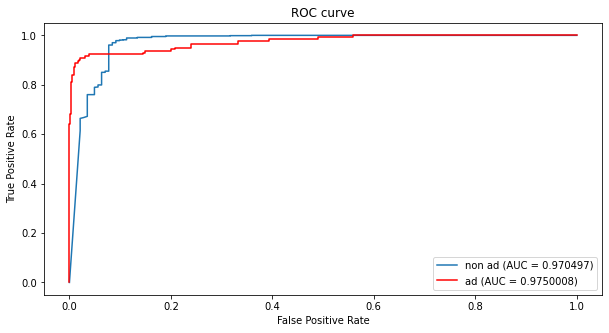

In [ ]:
pred1 = model2.predict(X_ads_test)
pred1 = np.transpose(pred1)
y_test = np.transpose(Y_ads_test)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

fpr, tpr, _ = metrics.roc_curve(y_test[0],  pred1[0])
fpr1, tpr1, _ = metrics.roc_curve(y_test[1],  pred1[1])
#create ROC curve
plt.plot(fpr,tpr, label=f'non ad (AUC = {metrics.auc(fpr, tpr):.7})')
plt.plot(fpr1,tpr1, color='red', label=f'ad (AUC = {metrics.auc(fpr1, tpr1):.7})')
plt.title(f'ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

Patrząc na krzywą ROC widzimy, że model dobrze nadaje się do klasyfikacji, powierzchnie pod wykresami są porównywalne więc model podobnie dobrze radzi sobie z rozpoznawanie reklam jak i nie-reklam.

## Confusion matrix

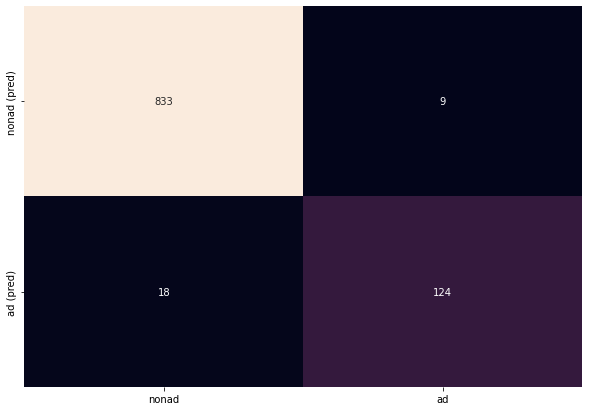

In [ ]:
confusion_matrix = confusion_matrix(y_label, predict_label)
cm_df = pd.DataFrame(
    confusion_matrix, 
    index = [idx for idx in ['nonad (pred)', 'ad (pred)']],
    columns = [col for col in ['nonad', 'ad']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True, cbar=False, fmt='g')

Patrząc na confusion matrix widzimy, że model dobrze przewiduje czy obrazek jest reklamą czy nie biorąc pod uwagę, że nie-reklamy stanowiły 86% zbioru testowego.

#Chess - SOM

##Struktura sieci

Korzystam z minisom do implementacji sieci SOM. Wybieram 50 jako rozmiar mapy. Wartość sigmy początkowo ustawiam na wartość 5.

In [ ]:
# Podział zbiorów na zbiory trenujące i testowe
X_train, X_test, Y_train, Y_test = train_test_split(X_chess, Y_chess, test_size=0.20, random_state=31)

In [ ]:
som = MiniSom(x=50, y=50, input_len= 48, sigma=5.0, learning_rate=0.1)
som.random_weights_init(X_train)

##Uczenie sie

In [ ]:
som.train_random(data=X_train, num_iteration=500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.003792719837141949


##Wyniki

In [ ]:
def classify(som, data, Xtrain, Ytrain):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(Xtrain, Ytrain)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

Obliczam średnią precyzję modelu. W tym celu korzystam z raportu klasyfikacji z modułu sklearn

In [ ]:
print(metrics.classification_report(Y_test, classify(som, X_test, X_train, Y_train)))

              precision    recall  f1-score   support

           0       0.30      0.68      0.42       555
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        21
           3       0.18      0.07      0.10        43
           4       0.00      0.00      0.00        12
           5       0.00      0.00      0.00        41
           6       0.33      0.06      0.10        90
           7       0.24      0.07      0.11       117
           8       0.00      0.00      0.00       137
           9       0.24      0.38      0.30       271
          10       0.22      0.17      0.20       340
          11       0.22      0.06      0.10       403
          12       0.23      0.16      0.19       571
          13       0.33      0.21      0.26       770
          14       0.34      0.32      0.33       880
          15       0.37      0.58      0.45       911
          16       0.28      0.24      0.26       384
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Uzyskujemy niską precyzję, w dalszej części poprawiam parametry w celu uzyskania lepszych wyników

##Dostrajanie

W celu ulepszenia modelu, trenujemy sieć korzystając z różnych typów funckji sąsiedztwa oraz aktywacyjnych. Wartość sigma w każdym przypadku została ustawiona na 1 gdyż taka wartość dawała najlepszy rezultat. 

In [ ]:
som = MiniSom(18,18, input_len= 6, sigma=1.0, learning_rate=0.5, 
              neighborhood_function='gaussian',   activation_distance="euclidean")
som.random_weights_init(X_train)
som.train(X_train, 500, verbose=True)
print(metrics.classification_report(Y_test, classify(som, X_test, X_train, Y_train)))

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.002479906882501957
              precision    recall  f1-score   support

           0       0.38      0.62      0.47       555
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        43
           4       0.00      0.00      0.00        12
           5       0.15      0.17      0.16        41
           6       0.25      0.29      0.27        90
           7       0.17      0.13      0.15       117
           8       0.27      0.06      0.10       137
           9       0.30      0.41      0.34       271
          10       0.24      0.24      0.24       340
          11       0.20      0.02      0.04       403
          12       0.26      0.20      0.23       571
          13       0.30      0.28      0.29       770
          14       0.40      0.36      0.38       880
          15       0.40      0.57      0.47       911
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Uzyskaliśmy drobną poprawę względem precyzji, błąd nie uległ większym zmianom, co oznacza że mapa nie robiła dużo zmian od swoich początkowych wartości.

#Reklamy - SOM

##Struktura sieci

Podobnie jak w przykładzie szachów, stosujemy 50 neuronów w obu osiach mapy.

In [ ]:
X_ads_train, X_ads_test, Y_ads_train, Y_ads_test = train_test_split(X_ads, Y_ads, test_size=0.20, random_state=31)

In [ ]:
som_ads = MiniSom(x=50, y=50, input_len=1558, 
                  sigma=1.0, learning_rate=0.5)
som_ads.random_weights_init(X_ads_train)

##Uczenie sie

In [ ]:
som_ads.train_random(data=X_ads_train, num_iteration=500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.35321831602770315


##Wyniki

Wykorzystując raport klasyfikacji z modułu sklearn, obliczyliśmy średnią precyzję modelu.


In [ ]:
print(metrics.classification_report(Y_ads_test, classify(som_ads, X_ads_test, X_ads_train, Y_ads_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       563
           1       0.86      0.83      0.84        93

    accuracy                           0.96       656
   macro avg       0.91      0.90      0.91       656
weighted avg       0.96      0.96      0.96       656



##Dostrajanie

By ulepszyć model, eskperymentowałem z wartościami i funkcjami, tak samo jak w przykładzie wyżej. Znajduje się tu finalny rezultat. Liczba neuronów nie uległa zmianie, gdyż wydłużało by to czas obliczeń modelu, a z rezultatów wyszło że precyzja za bardzo nie wzrosła. Wartość sigma pozostaje na 1.0, gdyż większa wartość zwiększa błąd.

In [ ]:
som_ads = MiniSom(x=18, y=18, input_len=1558, 
                  sigma=1.0, learning_rate=0.5,
                  neighborhood_function='bubble',
                  activation_distance='cosine')
som_ads.random_weights_init(X_ads_train)
som_ads.train_random(data=X_ads_train, num_iteration=500, verbose=True)
print(metrics.classification_report(Y_ads_test, classify(som_ads, X_ads_test)))

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.2895577895720718
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       563
           1       0.89      0.84      0.86        93

    accuracy                           0.96       656
   macro avg       0.93      0.91      0.92       656
weighted avg       0.96      0.96      0.96       656



Jak można zauważyć, błąd spadł, a prezycja wzrosła.


#Podsumowanie

Patrząc na oba zestawy danych jesteśmy w stanie dojść do wniosku, że oba datasety nie są ciekawymi oraz trudnymi danymi dla sieci neuronowych. 

Zaczynając od prostszego przykładu z reklamami, mamy tam wiele wartości, które są bardzo charakterystyczne dla reklam, jak "click here" albo "buy now". Sprawia to, że istnienie tych wartości upewnia model w tym co jest reklamą. Tutaj można by było się pokusić o usunięcie najbardziej dominujących elementów z rekordów, by zobaczyć jak sieć by sobie poradziła z danymi mniej oczywistymi. 

Patrząc na dataset z szachami, w przypadku sieci feed-forward mamy podobną sytuację. Dla tego rodzaju sieci problem staje się bardzo trywialny, lecz sieć nadal potrzebuje trochę więcej czasu na uzyskanie dużej precyzji. W przypadku self-organizing map, bardzo słabe wyniki są podyktowane tym że korzystamy z klasyfikatorów binarnych na wejściu, co nie jest idealne dla takiego typu sieci.

W obu przypadkach, jesteśmy w stanie zaimplementować klasyfikator, który nie polega na sieciach neuronowych i otrzymać podobne wyniki. Również, można by było rozszerzyć te oba problemy, jak opisana wyżej propozycja w przypadku reklam oraz nieograniczanie się do trzech pionków w przypadku szachów.